   # Post-Double-Selection Procedure

Author: [Anthony Strittmatter](https://www.anthonystrittmatter.com/)

The Job Corps is the largest U.S. labor market program targeting disadvantaged youths. It  provides  academic, vocational, and  social training, as well as health care counseling and job search assistance, for an average duration of eight to nine months. Mathematica Policy Research carried out a randomized experiment with the Job Corps. About 60% of the experimental participants were randomly selected to receive an offer to participatein the Job Corps. Out of these, 73% joined the Job Corps program and actually started to participate after an average duration of 1.4 months. The remaining experimental 
participants were assigned to the control group. Control group members were not eligible for the Job Corps programs for three years following randomization (approximately 1% participated anyway).

We estimate the effects of actually participating in the Job Corps on earnings fours years after the randomization. The experimental Job Corps data job_corps.csv contains 10,516 observations.

**Variable list :** 

* **EARNY4**: Earnings per week in Year 4
* **assignment**: Dummy for randomized offer to join Job Corps
* **participation**: Dummy for actual participation in Job Corps
* **female**: Dummy for females
* **age1**: Aged between 16-17 years
* **age2**: Aged between 18-19 years
* **age3**: Aged between 20-24 years
* **ed_06**: 0-6 months education program in last year prior experiment
* **ed_612**: 6-12 months education program in last year pror experiment
* **hs_ged**: High school or GED credential (general educational development test)
* **white**: Dummy for white ethnicity
* **black**: Dummy for African-American ethnicity
* **hisp**: Dummy for Hispanic ethnicity
* **oth_eth**: Dummy for other ethnicity
* **haschld**: Dummy for parents
* **livespou**: Lives with spouse or partner
* **everwork**: Ever had job for two weeks or more
* **yr_work**: Worked in year prior to random assignment
* **currjob**: Has job at random assignment
* **job0_3**: Below 3 months employed in last year
* **job3_9**: 3-9 months employed in last year
* **job9_12**: 9-12 months employed in last year
* **earn1**: Yearly earnings less than \$1'000 prior experiment 
* **earn2**: Yearly earnings \$1'000-5'000 prior experiment 
* **earn3**: Yearly earnings \$5'000-10'000 prior experiment 
* **earn4**: Yearly earnings above \$10'000 prior experiment 
* **badhlth**: Dummy for bad health
* **welf_kid**: Family on welfare when growing up
* **got_fs**: Received food stamps in last year
* **publich**: Public or rent-subsidized housing
* **got_afdc**: Received AFDC (aid for families with dependent children) in last year
* **harduse**: Used hard drugs in last year
* **potuse**: Smoked marijuana in last year
* **evarrst**: Ever arrested dummy
* **pmsa**: Lives in PMSA (primary metropolitan statistical area)
* **msa**: Lives in MSA (metropolitan statistical area)

Load the data job_corps.csv. If necessary, install the packages hdm, glmnet, tidyverse, AER, lmtest, sandwich, and fBasics.
 

# Load Packages and the Data

In [1]:
##############################################################################
########################  Load Packages and the Data  ########################
##############################################################################

options(warn=-1)     # supress warnings

### Load the packages  
library(fBasics)     # use for descriptive statistics
library(glmnet)      # use for lasso and Elastic Net regularized Generalized Linear Models
library(tidyverse)   # use for handling data
library(AER)         # use for IV
library(lmtest)      # use for heteroscedasticity robust standard errors
library(sandwich)    # use for heteroscedasticity robust standard errors
library(hdm)         # use for Lasso and Post-Double-Selection


print('All packages successfully installed and loaded.')

### Load the Data
df <- read.csv("job_corps.csv",header=TRUE, sep=",")
print('Data successfully loaded.')

########################################################################

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: Matrix
Loaded glmnet 4.1
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks timeSeries::filter(), stats::filter()
x dplyr::lag()    masks timeSeries::lag(), stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()
Loading required package: car
Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some

The following object is masked from 'package:fBasics':

    densityPlot

Loading required package: lmtest
Loadi

[1] "All packages successfully installed and loaded."
[1] "Data successfully loaded."


# Descriptive Statistics

In [2]:
##########################################################################
########################  Descriptive Statistics  ########################
##########################################################################

## Table with Descriptive Statistics 
desc <- fBasics::basicStats(df) %>% t() %>% as.data.frame() %>% 
  select(Mean, Stdev, Minimum, Maximum, nobs)
print(round(desc, digits=2))

########################################################################

                Mean  Stdev Minimum Maximum  nobs
EARNY4        204.44 195.69       0 2409.91 10516
assignment      0.60   0.49       0    1.00 10516
participation   0.44   0.50       0    1.00 10516
female          0.43   0.49       0    1.00 10516
age_1           0.41   0.49       0    1.00 10516
age_2           0.31   0.46       0    1.00 10516
age_3           0.27   0.45       0    1.00 10516
ed0_6           0.26   0.44       0    1.00 10516
ed6_12          0.36   0.48       0    1.00 10516
hs_ged          0.24   0.43       0    1.00 10516
white           0.26   0.44       0    1.00 10516
black           0.49   0.50       0    1.00 10516
hisp            0.17   0.38       0    1.00 10516
oth_eth         0.07   0.26       0    1.00 10516
haschld         0.20   0.40       0    1.00 10516
livespou        0.06   0.24       0    1.00 10516
everwork        0.80   0.40       0    1.00 10516
yr_work         0.64   0.48       0    1.00 10516
currjob         0.21   0.40       0    1.00 10516


There are no missings (see last column *nobs*). All variables (excluding earnings) are binary dummies.

# Univariate OLS Regression

We want to estimate the causal effect of participation in Job Corps on earnings. For this purpose, we estimate the univariate linear regression model,

\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation +u.
\end{equation*}

**Questions:**

1. How large is the effect of participation in Job Corps on earnings?
2. What is the main assumtpion we have to make to interprete this effect in a causal way?
3. How credible is the identifying assumption in this application?
4. Can we improve the credibility of the identification strategy using observable exogeneous charactersitics $X$?

In [3]:
#########################################################################
########################  Univariate OLS Regression #####################
#########################################################################

## Univariate OLS
ols1 <- lm(EARNY4 ~ participation, data = df)
summary(ols1)

## Store results
results <- as.matrix(coef(summary(ols1))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])
labels <- c("Univariate OLS")
colnames(results) <- labels
print(round(results, digits=2))

########################################################################


Call:
lm(formula = EARNY4 ~ participation, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.44 -168.41  -25.03  101.08 2210.97 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    198.936      2.550  78.023  < 2e-16 ***
participation   12.503      3.842   3.254  0.00114 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.6 on 10514 degrees of freedom
Multiple R-squared:  0.001006,	Adjusted R-squared:  0.0009111 
F-statistic: 10.59 on 1 and 10514 DF,  p-value: 0.001141


           Univariate OLS
Estimate            12.50
Std. Error           3.84
Pr(>|t|)             0.00


**Answers:**

1. The estimation results suggest that participation in Job Corps increased weekly earnings by 12.50 Dollars four years after the experiment.
2. The main identifying assumptions is the error term $u$ is independent of $participation$, $E[u|participation =1] = E[u|participation =0]$. Additionally, we have to make the stable unit treatment valua assumption (SUTVA) and common support. The SUTVA excludes spillover and general equilibrium effects. The common support assumption can be tested and is valid in this application. However, both assumptions are not the focus of this tutorial.
3. The offer to participate in Job Corps was randomized in the experiment. However, actual participation was not randomized. Individuals could self-select based on preferences or expected returns to training into participation in the Job Corps program. This could create selection bias. Accordingly, the main identifying assumption is not credible. For example, those individuals with good labor market persectives could be overrepresented among the participants. This could lead to a negative selection bias,  if the effect of participation is neatively corrleated with labor market perspectives.
4. We could increase the credibility of the identification strategy by conditioning on exogeneous confounders $X$. This are observable characteristics which have a joint impact on earnings and the probability to participate in the Job Corps program. We could relax the aformentioned independence assumption to $E[u|participation =1,X] = E[u|participation =0,X]$.

# Multivariate OLS Regression

Now we estimate the multivariate linear regression model,

\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation + \beta \cdot X + u.
\end{equation*}

The main identifying assumption $E[u|participation =1,X] = E[u|participation =0,X]$ is weaker than for the univariate model. But we have to assume additionally effect homogeneity, i.e., the effect of participation in Job Corps on earnings is equal for all individuals. We could relax this assumption by including interaction terms between $participation$ and $X$, but this would make the model more complicated and difficult to interpret.

### QUESTION: HOW TO SELECT THE CONTROL VARIABLES $X$?



Ideas to select control variables:

1. Standardized differences
2. Domain knowledge
3. Kitchen sink

**Idea 1 (Standardized Differences):** Compare the difference in the observable characteristics between the groups of participants and non-participants. Characteristics which differ greatly between the two groups appear to be important control variables.

In [4]:
########################################################################
########################  Standardized Differences #####################
########################################################################

## Means and standard deviations for the participants (D=1)
desc_1 <- fBasics::basicStats(df[df$participation==1,]) %>% t() %>% as.data.frame() %>% select(Mean, Stdev)

## Means and standard deviations for the non-participants (D=0)
desc_0 <- fBasics::basicStats(df[df$participation==0,]) %>% t() %>% as.data.frame() %>% select(Mean, Stdev)

# Make table and add standardized differences
desc <- cbind(desc_1[-c(1:3),],desc_0[-c(1:3),], 
        100*abs(desc_1[-c(1:3),1]-desc_0[-c(1:3),1])/sqrt(0.5*(desc_1[-c(1:3),2]^2+desc_0[-c(1:3),2]^2)))
colnames(desc) <- c("D=1 Mean", "D=1 Std.Dev.", "D=0 Mean", "D=0 Std.Dev.", "Std.Diff.")
print(round(desc, digits=2))

########################################################################

         D=1 Mean D=1 Std.Dev. D=0 Mean D=0 Std.Dev. Std.Diff.
female       0.43         0.50     0.42         0.49      1.80
age_1        0.43         0.50     0.40         0.49      7.54
age_2        0.31         0.46     0.32         0.47      2.94
age_3        0.26         0.44     0.28         0.45      5.28
ed0_6        0.27         0.44     0.26         0.44      0.83
ed6_12       0.37         0.48     0.35         0.48      3.90
hs_ged       0.22         0.42     0.25         0.43      5.56
white        0.26         0.44     0.27         0.44      2.36
black        0.50         0.50     0.49         0.50      2.07
hisp         0.17         0.38     0.17         0.38      0.25
oth_eth      0.07         0.26     0.07         0.26      0.38
haschld      0.19         0.39     0.21         0.40      5.09
livespou     0.05         0.22     0.07         0.26      9.14
everwork     0.79         0.41     0.80         0.40      2.00
yr_work      0.64         0.48     0.65         0.48   

The standardized differences ($SD$) are defined as

$SD = 100 \displaystyle \cdot \frac{|\bar{X}_1 - \bar{X}_0|}{\sqrt{1/2 \cdot (\sigma_{X1}^2+\sigma_{X0}^2)}}$

where $\bar{X}_1$ and $\bar{X}_0$ are the means and $\sigma_{X1}$ and $\sigma_{X0}$ the standard deviations in the groups of participants and non-participants, respectively. Large standardized differences indicate a large inbalance between participants and non-participants.


We observe that older people and individuals who have a child or live with their spouse are less likely to participate in Job Corps. Accordingly, this might be important confounders. 

In [5]:
#########################################################################
########################  Multivariate OLS Regression ###################
#########################################################################

## Multivariate OLS
ols2 <- lm(EARNY4 ~ participation + age_1 + age_3 + haschld + livespou, data = df)
summary(ols2)
# Question: Why do we omit age_2?

## Store results
results <- as.matrix(cbind(results,coef(summary(ols2))[2, c("Estimate", "Std. Error", "Pr(>|t|)")]))
labels <- c(labels, "Multivariate OLS1")
colnames(results) <-labels
print(round(results, digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(results[1,2]-results[1,1])/results[1,1], digits=1),"%"))

########################################################################


Call:
lm(formula = EARNY4 ~ participation + age_1 + age_3 + haschld + 
    livespou, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-263.65 -159.51  -18.51   97.11 2200.32 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    209.587      3.892  53.849  < 2e-16 ***
participation   13.880      3.818   3.635 0.000279 ***
age_1          -31.136      4.512  -6.901 5.47e-12 ***
age_3           28.326      5.041   5.619 1.96e-08 ***
haschld        -34.987      5.036  -6.948 3.94e-12 ***
livespou        11.854      7.977   1.486 0.137288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 194.1 on 10510 degrees of freedom
Multiple R-squared:  0.01708,	Adjusted R-squared:  0.01661 
F-statistic: 36.52 on 5 and 10510 DF,  p-value: < 2.2e-16


           Univariate OLS Multivariate OLS1
Estimate            12.50             13.88
Std. Error           3.84              3.82
Pr(>|t|)             0.00              0.00
[1] "Relative change in the estimated effect: 11%"


When controlling for age, children, living together with spouse, the estimated effect increases by 11\%. Participation in Job Corps increases earnings by 13.84 Dollars.

**Idea 2 (Domain Knowledge):** We can select the control variables $X$ using economic theory, domain knowledge, or intuition. For example, Job Corp participants usually live on a campus during the program participation. Do you think having a child affects the participation probability of men and women equally? Has gender an impact on earnings? What can we conclude from these thoughts?

Please specify an alternative model specification based on your economic intution below (replace *???*):

In [6]:
#########################################################################

## Multivariate OLS
ols3 <- lm(EARNY4 ~ participation + age_1 + age_3 + haschld*female + livespou, data = df)
summary(ols3)

## Store results
results <- as.matrix(cbind(results,coef(summary(ols3))[2, c("Estimate", "Std. Error", "Pr(>|t|)")]))
labels <- c(labels, "Multivariate OLS2")
colnames(results) <-labels
print(round(results, digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(results[1,3]-results[1,2])/results[1,2], digits=1),"%"))

########################################################################


Call:
lm(formula = EARNY4 ~ participation + age_1 + age_3 + haschld * 
    female + livespou, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-287.57 -146.39  -20.45   95.97 2241.50 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     233.485      4.157  56.164  < 2e-16 ***
participation    14.937      3.771   3.962 7.50e-05 ***
age_1           -32.515      4.456  -7.296 3.17e-13 ***
age_3            25.972      4.979   5.216 1.87e-07 ***
haschld         -13.463      8.409  -1.601   0.1094    
female          -65.073      4.361 -14.923  < 2e-16 ***
livespou         13.172      7.927   1.662   0.0966 .  
haschld:female    1.346     10.229   0.132   0.8953    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 191.6 on 10508 degrees of freedom
Multiple R-squared:  0.04183,	Adjusted R-squared:  0.04119 
F-statistic: 65.54 on 7 and 10508 DF,  p-value: < 2.2e-16


           Univariate OLS Multivariate OLS1 Multivariate OLS2
Estimate            12.50             13.88             14.94
Std. Error           3.84              3.82              3.77
Pr(>|t|)             0.00              0.00              0.00
[1] "Relative change in the estimated effect: 7.6%"


The estimated effect of participation on earnings increases by 7.6\% to 14.94 Dollars.

**Idea 3 (Kitchen Sink):** Based on our previous results, we could argue that it is best to control for everything available (brute force). This includes all exogeneous baseline characteristics as well as interaction terms.

In [7]:
###############################################################################

## Generate first-order interactions between all control variables
interactions <- t(apply(df[,-c(1,2,3,6,11)], 1, combn, 2, prod))
colnames(interactions) <- paste("Inter.V", combn(1:ncol(df[,-c(1,2,3,6,11)]), 2, paste, collapse="V"), sep="")
print(paste0("Number of interaction terms: ", ncol(interactions)))

## Merge basline characteristics with interaction terms
df_int <- as.data.frame(cbind(df[,-c(2,6,11)], interactions))
print(paste0("Total number of control variables: ", ncol(df_int)-2))

## Multivariate OLS with all baseline characteristics and interaction terms
ols4 <- lm(EARNY4 ~ ., data = df_int)

## Store results
results <- as.matrix(cbind(results,coef(summary(ols4))[2, c("Estimate", "Std. Error", "Pr(>|t|)")]))
labels <- c(labels, "Multivariate OLS3")
colnames(results) <-labels
print(round(results, digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(results[1,4]-results[1,3])/results[1,3], digits=1),"%"))

########################################################################

[1] "Number of interaction terms: 465"
[1] "Total number of control variables: 496"
           Univariate OLS Multivariate OLS1 Multivariate OLS2 Multivariate OLS3
Estimate            12.50             13.88             14.94             16.09
Std. Error           3.84              3.82              3.77              3.68
Pr(>|t|)             0.00              0.00              0.00              0.00
[1] "Relative change in the estimated effect: 7.7%"


The estimated effect of Job Corp participation on earnings increases by another 7.7\% to 16.09 Dollars. Compared to the univariate OLS results, the effect increases by 28.7\%.

To bring it to an extreme, we generate now 5'000 random variables and add them to the model. We know that the estimated effect should not change when we add these variables, because they are independent of the participation decision and earnings.

In [8]:
###############################################################################

# Set starting value for replicability (variables are randomly generated)
set.seed(123456789) 

# Specify number of random variables
cols <- 1000

# Generate random variables
redundant_x <- matrix(rnorm(nrow(df_int)*cols), nrow = nrow(df_int)) # We draw from a random standard normal distribution
colnames(redundant_x) <- paste("Rand.", 1:cols, sep="")

# Merge random variables with baseline characteritics and interaction terms
df_red <- as.data.frame(cbind(df_int, redundant_x))
print(paste0("Total number of control variables: ", ncol(df_red)-2))

###############################################################################

[1] "Total number of control variables: 1496"


In [9]:
###############################################################################

## Multivariate OLS with all baseline characteristics, interaction terms, and random variables
ols5 <- lm(EARNY4 ~ ., data = df_red)

## Store results
results <- as.matrix(cbind(results,coef(summary(ols5))[2, c("Estimate", "Std. Error", "Pr(>|t|)")]))
labels <- c(labels, "Multivariate OLS4")
colnames(results) <-labels
print(round(results, digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(results[1,5]-results[1,4])/results[1,4], digits=1),"%"))

########################################################################

           Univariate OLS Multivariate OLS1 Multivariate OLS2 Multivariate OLS3
Estimate            12.50             13.88             14.94             16.09
Std. Error           3.84              3.82              3.77              3.68
Pr(>|t|)             0.00              0.00              0.00              0.00
           Multivariate OLS4
Estimate               17.33
Std. Error              3.87
Pr(>|t|)                0.00
[1] "Relative change in the estimated effect: 7.7%"


Adding these randomly generated variables to the model should not affect the estimated effect at all, because the randomly generated variables are no confounders by construction. However, the effect size increases by another 5.7\% and the standard errors increase by more than 40\%.

**Conclusions:**

- Adding relevant confounders increases the credibility of the identifying strategy.
- However, it is difficult to determine the relevant control variables. Often economic theory is ambiguous and gives no clear guidance.
- Particularly, it is difficult to identify the relvant interaction terms.
- Seemingly, an attractive approach is to use a kitchen sink regression. But this approach can lead to inprecise estimates, which might lead to larger finite sample biases than omitted variables.
- We face a trade-off between bias (too parsimonious model) and variance (too flexible model and redundant control variables).

# Post-Double-Selection Procedure

The Lasso objective function is

\begin{equation*}
\min_{\beta} \left\{ \sum_{i=1}^{N} \left( Y_i-  \gamma -\sum_{j=1}^{p}X_{ij}\beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\hat{l}_j \beta_j| \right\}.
\end{equation*}
where $p$ are the number of of characteristics. The Lasso minimizes the sum of squared residuals (similar to OLS), subject to a penalty on the absolute size of the coefficients $\beta_j$. The penalty term $\lambda \geq 0$ enables to regulate the degree of penalization. When $\lambda=0$, there is no penalization and the Lasso and OLS estimates are similar. When $\lambda>0$, some coefficients are shrunken towards zero and eventually approach zero excatly. When $\lambda$ is very large, all coefficients are zero, excluding the constant $\gamma$. The constant term is not penalized. When the coefficient $\beta_j$ is zero, this is equivalent to omit the corresponding characterstic $X_j$ from the model. Accordingly, the Lasso is a model selection device. 

An important tuning parameter is the penalty term $\lambda$. We consider two alternative ways of specifying the $\lambda$:

1. [Belloni et al. (2012)](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA9626) propose to use the theoretically derived optimal penalty term
\begin{equation*}
\displaystyle \lambda = \frac{2 c \cdot \Phi^{-1}\left(\frac{1-\gamma}{2p} \right)}{\sqrt{N} }
\end{equation*}
with the default values $c=1.1$ and $\gamma = 0.1/log(N)$.

2. Alteratively, we can use a cross-validation procedure the specify the optimal penalty term. We partition the sample into $k$ equally large folds and specify a grit of possible $\lambda$ values (typically equispaced on a log-scale). We estimate the Lasso for a specific $\lambda$ value in $k-1$ folds and extrapolate the fitted values to the retained fold. Then we calculate the model quality in the retained fold (e.g. using the MSE). We repeat this procedure k-times while alternating the retained fold. We calculate the average model quality across all folds. Then we repeat this procedure for all $\lambda$ values on the grit. Finally, we select the $\lambda$ value with the best average model quality. [Chetverikov, Liao, and Chernozhukov (2020)](https://arxiv.org/abs/1605.02214) provide the theoretical justification for the validty of this procedure.

The penalty loadings $\hat{l}_j$ can account for heteroskedasticity. For the standard Lasso we standardize all characteristics before the estimation and set the penalty loadings to one. Alternatively, [Belloni et al. (2012)](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA9626) propose an iterative procedure to estimate the penalty loadings. When we use these penalty loading it is not required standardize the characteristics in the first place.

The post-double-selection (PDS) procedure of [Belloni, Chernozhukov, and Hansen (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?redirectedFrom=fulltext) has three steps:

1. Estimate the earnings equation $EARNY4 = \gamma_1 + \beta_1 \cdot X + \varepsilon$, excluding the participantion dummy, with Lasso.
2. Estimate the participation probability $participation = \gamma_2 + \beta_2 \cdot X + v$ with Lasso.
3. Denote the union of all characteristics with non-zero coefficients in either $\beta_1$ or $\beta_2$ by $\tilde{X}$. Estimate the Post-Lasso model 
\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation + \beta \cdot \tilde{X} + u
\end{equation*}
with OLS.

**Step 1:** Earnings Equation

In [10]:
###############################################################################
################# Earnings Equation ######################
###############################################################################

# Predict earnings
st1 <- rlasso(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$EARNY4), penalty = list(homoscedastic = FALSE))
summary(st1)

# Store selected variables
n1<- names(st1$coefficients[(st1$coefficients != 0) == TRUE])[-1]

###############################################################################


Call:
rlasso.default(x = as.matrix(df[, c(4:ncol(df))]), y = as.matrix(df$EARNY4), 
    penalty = list(homoscedastic = FALSE))

Post-Lasso Estimation:  TRUE 

Total number of variables: 33
Number of selected variables: 16 

Residuals: 
    Min      1Q  Median      3Q     Max 
-384.45 -131.90  -19.95   90.80 2194.30 

            Estimate
(Intercept)  189.994
female       -56.801
age_1         -3.582
age_2          0.000
age_3          8.514
ed0_6          0.000
ed6_12         0.000
hs_ged        29.675
white         22.872
black        -24.628
hisp           0.000
oth_eth        0.000
haschld        0.000
livespou       0.000
everwork      12.135
yr_work       41.323
currjob       18.280
job0_3         0.000
job3_9         0.000
job9_12        5.634
earn1        -25.530
earn2          0.000
earn3         24.463
earn4         64.541
badhlth        0.000
welf_kid     -12.330
got_fs        -6.239
publich        0.000
got_afdc       0.000
harduse        0.000
potuse       -16.297
evarrst 

**Step 2:** Participation Probability

In [11]:
###############################################################################
#################### Participation Probability #####################
###############################################################################

# Predict participation
st2 <- rlasso(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$participation), penalty = list(homoscedastic = FALSE))
summary(st2)

# Store selected variables
n2<- names(st2$coefficients[(st2$coefficients != 0) == TRUE])[-1]

###############################################################################


Call:
rlasso.default(x = as.matrix(df[, c(4:ncol(df))]), y = as.matrix(df$participation), 
    penalty = list(homoscedastic = FALSE))

Post-Lasso Estimation:  TRUE 

Total number of variables: 33
Number of selected variables: 1 

Residuals: 
    Min      1Q  Median      3Q     Max 
-0.4462 -0.4462 -0.4462  0.5538  0.6449 

            Estimate
(Intercept)    0.446
female         0.000
age_1          0.000
age_2          0.000
age_3          0.000
ed0_6          0.000
ed6_12         0.000
hs_ged         0.000
white          0.000
black          0.000
hisp           0.000
oth_eth        0.000
haschld        0.000
livespou      -0.091
everwork       0.000
yr_work        0.000
currjob        0.000
job0_3         0.000
job3_9         0.000
job9_12        0.000
earn1          0.000
earn2          0.000
earn3          0.000
earn4          0.000
badhlth        0.000
welf_kid       0.000
got_fs         0.000
publich        0.000
got_afdc       0.000
harduse        0.000
potuse         0.000
ev

**Step 3:** Post-Lasso

In [12]:
###############################################################################
######################## Post-Lasso ####################
###############################################################################

# Take union of selected covariates
selected_covariates <- c("participation", unique(c(n1, n2)))

# Setup the formula of the linear regression model
sumx <- paste(selected_covariates, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso regression
ols <- lm(linear, data = df)
summary(ols)

# Heteroskedasticity robust standard errors
#coeftest(ols, vcov = vcovHC(ols, type = "HC1"))

###############################################################################


Call:
lm(formula = linear, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-378.47 -132.12  -20.12   91.01 2201.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    183.337      6.762  27.113  < 2e-16 ***
participation   15.678      3.650   4.295 1.76e-05 ***
female         -56.965      3.794 -15.015  < 2e-16 ***
age_1           -4.133      4.565  -0.905 0.365348    
age_3            8.685      4.931   1.761 0.078229 .  
hs_ged          29.911      4.861   6.153 7.87e-10 ***
white           23.023      5.167   4.456 8.44e-06 ***
black          -24.811      4.509  -5.502 3.84e-08 ***
everwork        12.168      6.236   1.951 0.051065 .  
yr_work         41.219      5.878   7.013 2.48e-12 ***
currjob         18.076      5.020   3.601 0.000319 ***
job9_12          5.685      5.675   1.002 0.316465    
earn1          -25.373      6.506  -3.900 9.68e-05 ***
earn3           24.666      6.107   4.039 5.40e-05 ***
earn4           65.047     

Participation in Job Corps increased weekly earnings by 15.68 Dollars four years after the experiment.

**Short-cut:** Estimate the Treatment Effect Directly

In [13]:
###############################################################################
############ Estimate the Treatment Effect Directly ##################
###############################################################################

# Post-Double-Selection Procedure 
dsp <- rlassoEffect(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$EARNY4)
          , as.matrix(df$participation), model = TRUE, penalty = list(homoscedastic = FALSE), method = "double selection")
summary(dsp)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)    
d1    15.678      3.661   4.282 1.85e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



**Question:** Why do the standard errors of the manualy and automatically estimated treatment effect differ?

**Exercise:**

Estimate the post-doube-selection procedure using all baseline charactersitics, interaction terms, and randomly generated variables. How large is the effect of Job Corps participation on earnings? Which baseline and interaction terms are relevant for the Post-Lasso model? Do you have an economic interpretation for the selected variables? Does the post-doube-selection procedure omit the randomly generated variables?

In [14]:
###############################################################################
# Earning Equation
###############################################################################

# Predict earnings
st1 <- rlasso(as.matrix(df_red[,c(3:ncol(df_red))]), as.matrix(df$EARNY4))

# Store selected variables
n1<- names(st1$coefficients[(st1$coefficients != 0) == TRUE])[-1]

###############################################################################
# Participation Probability
###############################################################################

# Predict participation
st2 <- rlasso(as.matrix(df_red[,c(3:ncol(df_red))]), as.matrix(df$participation))

# Store selected variables
n2<- names(st2$coefficients[(st2$coefficients != 0) == TRUE])[-1]

###############################################################################
# Post-Lasso Model
###############################################################################

# Take union of selected covariates
selected_covariates <- c("participation", unique(c(n1, n2)))

# Setup the formula of the linear regression model
sumx <- paste(selected_covariates, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso OLS regression
ols <- lm(linear, data = df_red)
summary(ols)

###############################################################################


Call:
lm(formula = linear, data = df_red)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.37 -131.57  -20.83   92.46 2159.74 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    189.1367     5.2034  36.348  < 2e-16 ***
participation   15.5914     3.6445   4.278 1.90e-05 ***
female         -55.9513     5.7300  -9.765  < 2e-16 ***
black          -22.3494     4.8730  -4.586 4.56e-06 ***
everwork        11.4068     6.2661   1.820 0.068729 .  
yr_work         40.9429     5.8469   7.002 2.67e-12 ***
currjob         17.1494     5.0291   3.410 0.000652 ***
job9_12       -139.4013   185.2433  -0.753 0.451749    
Inter.V1V2       2.3368     6.7338   0.347 0.728582    
Inter.V1V15    -15.8663     8.5924  -1.847 0.064841 .  
Inter.V1V18    -23.4954    10.4878  -2.240 0.025095 *  
Inter.V1V23     -8.4536     7.0062  -1.207 0.227618    
Inter.V1V24      0.5258     5.8523   0.090 0.928412    
Inter.V2V7     -17.2521     6.1544  -2.803 0.005069 ** 
Inter.V3

**Answers:**
- Participation in Job Corps increased weekly earnings by 15.59 Dollars four years after the experiment. 
- The model includes interactions of *female* (V1) with *age\_1* (V2), *job0\_3* (V15), *earn1* (V18), *welf\_kid* (V23), and *got\_fs* (V24); *age_1* (V2) with *black* (V7); *age\_3* (V3) with *earn4* (V21); *hs\_ged* (V6) with *everwork* (V12) and *pmsa* (V30); *black* (V7) with *potuse* (V28) and *evarrst* (V29); *yr\_work* (V13) with *job9\_12* (V17), *earn3* (V20), and *earn4* (V21); *welf\_kid* (V23) with *evarrst* (V29). 
- It is difficult to come up with an economic interpretation why exactly these interaction terms are selected. It is surprising that *hasschld* and *livespou* are not selected.  We should resist the temtation to overinterpret the selected variables. Particularly, we should not interpret the coefficients of the control variables in a causal way.
- The post-double-selection procedure does not select the randomly generated variables, which is correct.

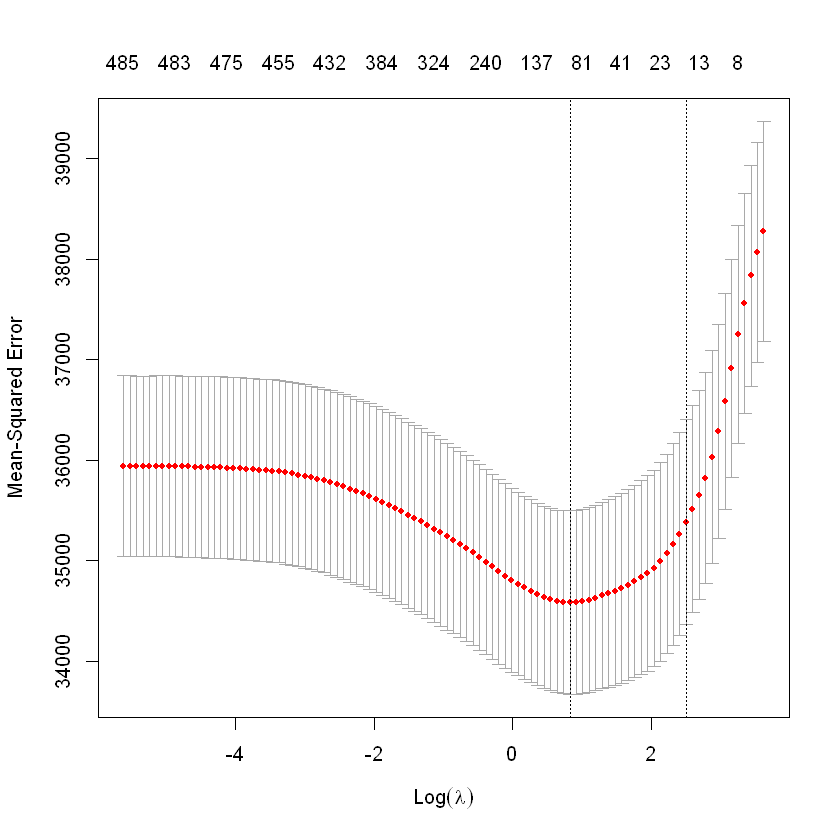

In [24]:
set.seed(123456789)

## Using Sample A to Predict Sample B
# Potential Earnings under Non-Treatment
lasso_y0_A <- cv.glmnet(as.matrix(df_int[,c(3:ncol(df_int))]), as.matrix(df$EARNY4), alpha=1, type.measure = 'mse')
plot(lasso_y0_A)


In [45]:
# Estimate LASSO model with 1 standard error lambda in training sample
lasso.linear.fit <- glmnet(as.matrix(df_int[,c(3:ncol(df_int))]), as.matrix(df$EARNY4),lambda = lasso_y0_A$lambda.1se)

# Select covariates with non-zero coefficients
coef <- predict(lasso.linear.fit, type = "nonzero") # Method 2
colnames <- colnames(df_int[,-c(1:2)])
selected.vars <- colnames[unlist(coef)]

In [46]:
selected.vars

[1] "female"       "black"        "yr_work"      "currjob"      "job9_12"     
 [6] "earn3"        "earn4"        "Inter.V2V7"   "Inter.V3V21"  "Inter.V6V12" 
[11] "Inter.V6V30"  "Inter.V12V13" "Inter.V12V14" "Inter.V12V17" "Inter.V13V17"
[16] "Inter.V13V20" "Inter.V13V21"

In [47]:
# Prepare (unscaled) LASSO variables
#lasso_covariates_hold_out <- as.data.frame(cbind(df_hold_out[,c(4:ncol(df_hold_out))],noise.covars.hold.out)) 
#lasso_covariates_est <- as.data.frame(cbind(df_est[,c(4:ncol(df_est))],noise.covars.est)) 

# Linear Post-LASSO fit in estimation sample
post.lasso.model <- paste("EARNY4", paste(selected.vars, collapse=" + "),  sep = " ~ ") 
post.lasso.model <- as.formula(post.lasso.model)
post.lasso <- lm(post.lasso.model, data=df_int)
summary(post.lasso)


Call:
lm(formula = post.lasso.model, data = df_int)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.62 -138.07  -20.85   92.85 2165.99 

Coefficients: (5 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   201.011      4.026  49.932  < 2e-16 ***
female        -59.864      3.715 -16.113  < 2e-16 ***
black         -31.713      4.313  -7.352 2.10e-13 ***
yr_work        39.518      4.423   8.935  < 2e-16 ***
currjob        18.529      5.018   3.692 0.000223 ***
job9_12      -205.550    186.434  -1.103 0.270254    
earn3          30.153      5.994   5.030 4.98e-07 ***
earn4          51.121     11.658   4.385 1.17e-05 ***
Inter.V2V7    -19.438      5.480  -3.547 0.000391 ***
Inter.V3V21    33.385     14.365   2.324 0.020140 *  
Inter.V6V12    25.544      5.226   4.888 1.03e-06 ***
Inter.V6V30    39.174      8.015   4.888 1.04e-06 ***
Inter.V12V13       NA         NA      NA       NA    
Inter.V12V14       NA         NA      NA 

**Exercise:**

Apply the Lasso to the equation
\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation + \beta \cdot X + u
\end{equation*}
for model selection. Estimate the selected model with a Post-Lasso OLS. Do the results make sense? Why is omitted variable bias inevitable?

In [ ]:
###############################################################################
# Earning Equation
###############################################################################

# Predict earnings
st1 <- rlasso(as.matrix(df_red[,c(2:ncol(df_red))]), as.matrix(df$EARNY4))

# Store selected variables
n1<- names(st1$coefficients[(st1$coefficients != 0) == TRUE])[-1]

# Setup the formula of the linear regression model
sumx <- paste(n1, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso OLS regression
ols <- lm(linear, data = df_red)
summary(ols)